data: https://www.data.gouv.fr/en/datasets/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012/

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# upload offenses datapoints
xf_file = '/content/crimes-et-delits-enregistres-par-les-services-de-gendarmerie-et-de-police-depuis-2012.xlsx'
xl = pd.ExcelFile(xf_file)

# select only datasets for Police Nationale (PN)
sheet_names = [sheet_name for sheet_name in xl.sheet_names if 'PN' in sheet_name]

In [3]:
def process_df(xl, sheet_name, index='départements'):
    '''Input: an excel file
    Output: a df reshape by French departments'''

    df = xl.parse(sheet_name=sheet_name, header=None).iloc[:20, 1:] # remove iloc later
    df = df.T

    # change column name and remove used to name column
    df.columns = df.loc[1]
    df = df.drop(1)

    df = df.drop(['Périmètres', 'Libellé index \ CSP'], axis=1)
    df = df.groupby('Départements').sum()

    if index == 'offenses':
        df = df.T
    
    return df

In [4]:
def total_crimes(sheet_names, index='départements'):
    '''Input: list of sheet names
    Output: df of total crimes per departéments'''

    yearly = {}

    for sheet_name in sheet_names:
        # find year in sheet name and use as key dict
        key = re.findall(r"\d{4}", sheet_name)[0]

        # calculate total crimes per year for each départements
        df = process_df(xl, sheet_name, index=index)
        df = df.apply(lambda x: x.sum(), axis=1)

        if key in yearly:
            print(sheet_name, 'is already in dataset')
        else:
            yearly[key] = df

    return pd.DataFrame(yearly)

In [18]:
d_map = create_map(departments['departmentCode'], departments['departmentName'])

In [5]:
total_crimes_per_dept = total_crimes(sheet_names, index='départements')
total_crimes_per_dept

,2012,2013,2014,2015,2016,2017,2018,2019
Départements,,,,,,,,
01,445,507,602,666,658,668,707,696
02,1764,1839,1705,1688,1513,1409,1653,1838
03,898,796,794,947,1021,1060,1241,1283
04,261,242,242,354,375,409,473,486
05,268,225,281,367,378,319,433,353
...,...,...,...,...,...,...,...,...
973,1203,1276,1638,1604,1581,1264,1019,1148
974,2791,2710,2659,2974,3405,3241,3469,3513
976,458,444,557,727,870,697,644,734


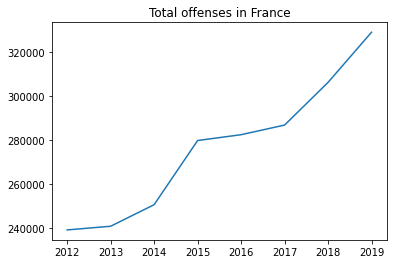

In [6]:
total_offenses_france = total_crimes_per_dept.sum(axis=0)
ax = total_offenses_france.plot(title='Total offenses in France')

In [7]:
total_crimes_per_offense = total_crimes(sheet_names, index='offenses')
total_crimes_per_offense

,2012,2013,2014,2015,2016,2017,2018,2019
1,,,,,,,,
Règlements de compte entre malfaireurs,50,34,45,42,59,84,93,71
Homicides pour voler et à l'occasion de vols,23,14,15,9,22,19,23,19
Homicides pour d'autres motifs,377,387,399,412,465,459,424,514
Tentatives d'homicides pour voler et à l'occasion de vols,47,68,43,67,62,74,76,73
Tentatives homicides pour d'autres motifs,1035,912,1055,1430,1638,1719,1820,2007
Coups et blessures volontaires suivis de mort,93,60,87,79,113,88,112,120
Autres coups et blessures volontaires criminels ou correctionnels,141918,141464,141757,154479,157782,162087,173174,185316
Prises d'otages à l'occasion de vols,7,11,16,12,11,14,46,64
Prises d'otages dans un autre but,12,15,19,12,19,26,65,98


TO DO:
Combine processed df with department names

In [3]:
# upload department code and names
departments = pd.read_csv('https://gist.githubusercontent.com/gzurbach/b0ccdeda51ec2fe135d5/raw/b89e3d2ac21ddb251b1aed0528ddc9437a07818f/departments_regions_france_2016.csv')

In [4]:
def create_map(departmentCode, departmentName):
    departmentCode = departmentCode.str.upper()
    tups = zip(departmentCode, departmentName)
    d = {}
    for code, name in tups:
        d[code] = name
    return d